In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df3 = pd.read_csv('Dataset_3.csv')

In [3]:
df3.shape

(200, 6)

In [4]:
df3.head()

,Genetic_Test_ID,Family_History_Cancer,Genetic_Risk_Score,Diet_Type,Alcohol_Consumption,Colon_Cancer_Type
0,G7000,No,0.899,Vegan,Occasional,Type X
1,G7001,No,0.710,Non-Vegetarian,Occasional,Type Y
2,G7002,No,0.937,Vegetarian,NaN,Type Z
3,G7003,No,0.603,Non-Vegetarian,NaN,Type X
4,G7004,Yes,NaN,Non-Vegetarian,Frequent,Type X


In [5]:
df3.isna().sum()

Genetic_Test_ID           0
Family_History_Cancer     0
Genetic_Risk_Score       20
Diet_Type                 0
Alcohol_Consumption      97
Colon_Cancer_Type         8
dtype: int64

In [6]:
df3['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Occasional    65
Frequent      38
Name: count, dtype: int64

In [7]:
df3['Alcohol_Consumption'].fillna('Never',inplace=True)

C:\Users\91976\AppData\Local\Temp\ipykernel_5752\3118679971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Alcohol_Consumption'].fillna('Never',inplace=True)


In [8]:
grs_mean_typea = df3[df3['Colon_Cancer_Type'] == 'Type X']['Genetic_Risk_Score'].mean()
print(grs_mean_typea)
grs_mean_typeb = df3[df3['Colon_Cancer_Type'] == 'Type Y']['Genetic_Risk_Score'].mean()
print(grs_mean_typeb)
grs_mean_typec = df3[df3['Colon_Cancer_Type'] == 'Type Z']['Genetic_Risk_Score'].mean()
print(grs_mean_typec)

0.5589803921568628
0.5642857142857143
0.5012727272727273


In [9]:
df3['Genetic_Risk_Score'] = df3['Genetic_Risk_Score'].fillna(df3.groupby('Colon_Cancer_Type')['Genetic_Risk_Score'].transform('mean'))

In [10]:
df3.dropna(inplace=True)

In [11]:
df3.isna().sum()

Genetic_Test_ID          0
Family_History_Cancer    0
Genetic_Risk_Score       0
Diet_Type                0
Alcohol_Consumption      0
Colon_Cancer_Type        0
dtype: int64

<AxesSubplot:xlabel='Genetic_Risk_Score', ylabel='Density'>

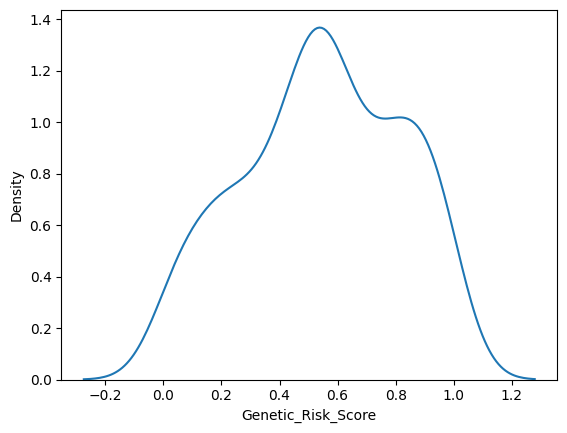

In [12]:
sns.kdeplot(df3['Genetic_Risk_Score'])

<AxesSubplot:ylabel='Genetic_Risk_Score'>

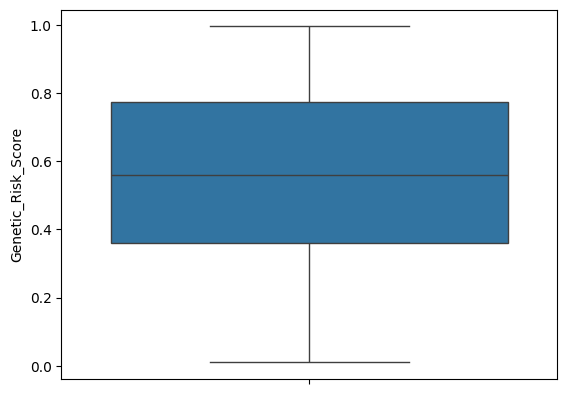

In [13]:
sns.boxplot(df3['Genetic_Risk_Score'])

<AxesSubplot:xlabel='Family_History_Cancer', ylabel='count'>

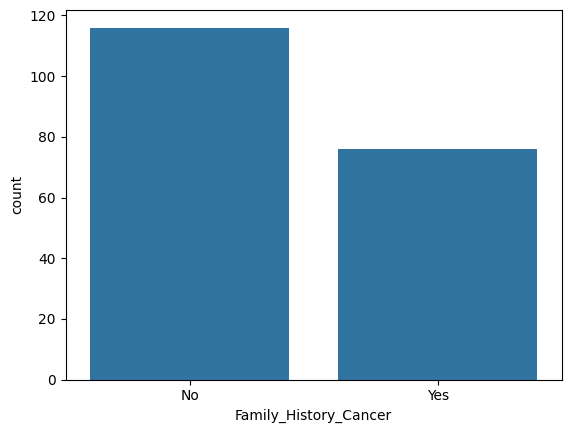

In [14]:
sns.countplot(x='Family_History_Cancer',data=df3)

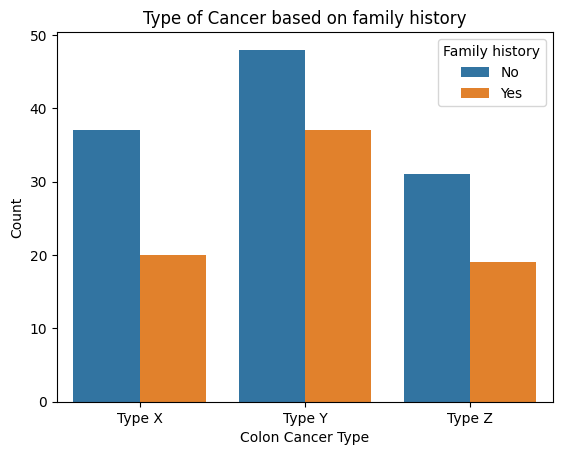

In [15]:
sns.countplot(x='Colon_Cancer_Type', hue='Family_History_Cancer', data=df3)
plt.title('Type of Cancer based on family history')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='Family history', loc='upper right')
plt.show()

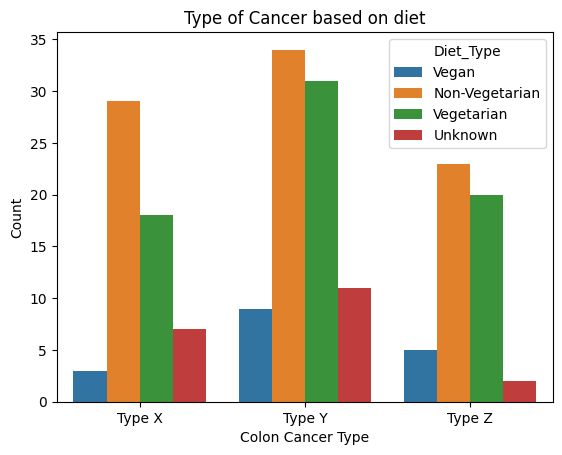

In [16]:
sns.countplot(x='Colon_Cancer_Type', hue='Diet_Type', data=df3)
plt.title('Type of Cancer based on diet')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='Diet_Type', loc='upper right')
plt.show()

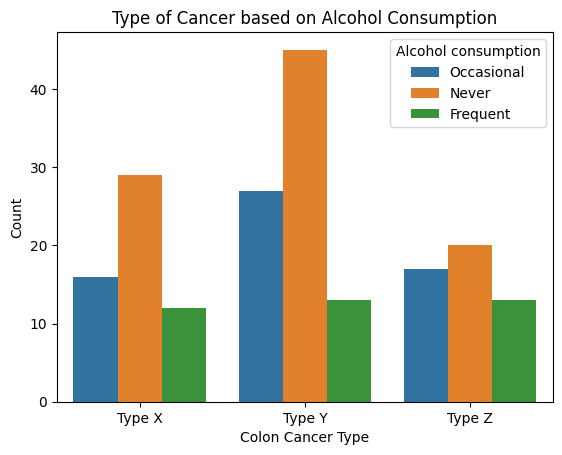

In [17]:
sns.countplot(x='Colon_Cancer_Type', hue='Alcohol_Consumption', data=df3)
plt.title('Type of Cancer based on Alcohol Consumption')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='Alcohol consumption', loc='upper right')
plt.show()

In [18]:
df3['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Never         94
Occasional    60
Frequent      38
Name: count, dtype: int64

In [19]:
family_history_mapping = {
    'No':1,
    'Yes':2
}

diet_mapping = {
    'Unknown':1,
    'Non-Vegetarian':2,
    'Vegetarian':3,
    'Vegan':4
}

alcohol_mapping = {   
    'Never':1,
    'Occasional':2,
    'Frequent':3
}

label_mapping = {   
    'Type X':1,
    'Type Y':2,
    'Type Z':3
}

df3['Family_History_Cancer'] = df3['Family_History_Cancer'].map(family_history_mapping)
df3['Diet_Type'] = df3['Diet_Type'].map(diet_mapping)
df3['Alcohol_Consumption'] = df3['Alcohol_Consumption'].map(alcohol_mapping)
df3['Colon_Cancer_Type'] = df3['Colon_Cancer_Type'].map(label_mapping)

In [20]:
df3.head()

,Genetic_Test_ID,Family_History_Cancer,Genetic_Risk_Score,Diet_Type,Alcohol_Consumption,Colon_Cancer_Type
0,G7000,1,0.89900,4,2,1
1,G7001,1,0.71000,2,2,2
2,G7002,1,0.93700,3,1,3
3,G7003,1,0.60300,2,1,1
4,G7004,2,0.55898,2,3,1


In [21]:
categorical_features = ['Family_History_Cancer', 'Diet_Type', 'Alcohol_Consumption', 'Colon_Cancer_Type']

def calculate_cramers_v(x, y):

    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

cat_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in categorical_features:
    for j in categorical_features:
        cat_corr.loc[i,j] = calculate_cramers_v(df3[i], df3[j])

cat_corr

,Family_History_Cancer,Diet_Type,Alcohol_Consumption,Colon_Cancer_Type
Family_History_Cancer,0.989111,0.05738,0.068911,0.075263
Diet_Type,0.05738,1.0,0.171148,0.117929
Alcohol_Consumption,0.068911,0.171148,1.0,0.093245
Colon_Cancer_Type,0.075263,0.117929,0.093245,1.0


In [22]:
df3['LifeStyle_Risk'] = df3['Family_History_Cancer'] + df3['Diet_Type'] + df3['Alcohol_Consumption']

Text(0.5, 1.0, 'Random Forest Feature Importance')

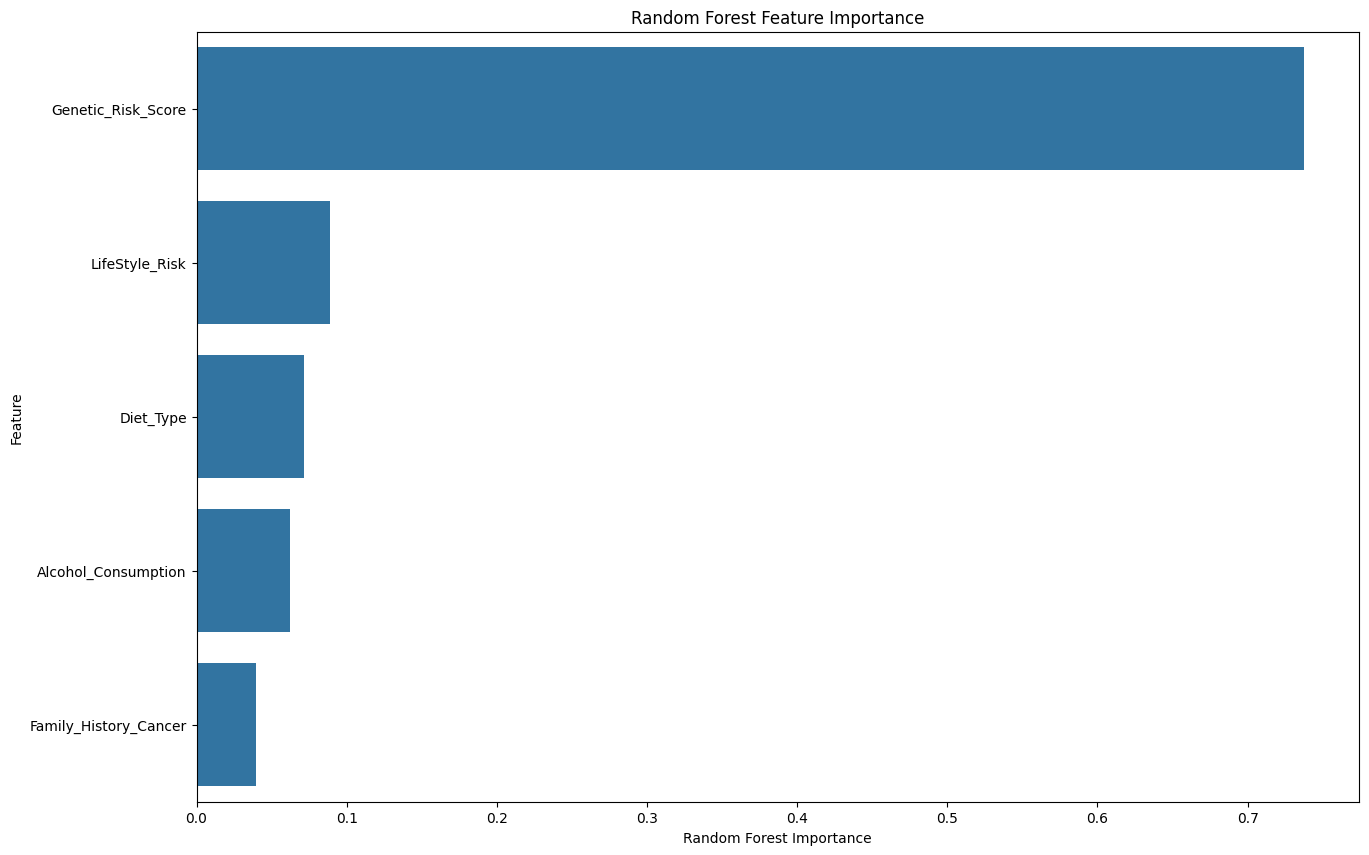

In [23]:
X = df3.drop(['Genetic_Test_ID', 'Colon_Cancer_Type'], axis=1)
y = df3['Colon_Cancer_Type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf.feature_importances_
})
rf_importance = rf_importance.sort_values('Random Forest Importance', ascending=False)


plt.figure(figsize=(15, 10))

sns.barplot(data=rf_importance, x='Random Forest Importance', y='Feature')
plt.title('Random Forest Feature Importance')

In [24]:
reduced_df3 = df3[['Genetic_Risk_Score', 'LifeStyle_Risk', 'Colon_Cancer_Type']]
reduced_df3.to_csv('reduced_df3.csv', index=False) 